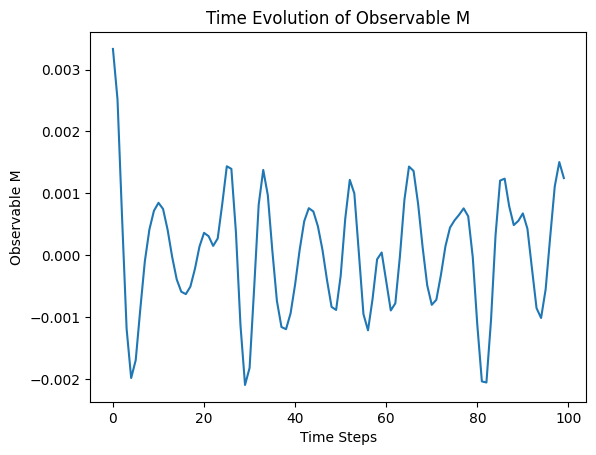

In [7]:
from itertools import product
import numpy as np
from scipy.sparse import lil_matrix, identity
from scipy.sparse.linalg import expm
import matplotlib.pyplot as plt

def basis_cr2(n):
    basis = []
    L = n + 1  # Length of the spin chain plus one for periodic boundary conditions
    r_spins = list(product([1, 0], repeat=L))  # Generate all possible spin configurations
    
    for state in r_spins:
        # Check for the allowed configurations only
        valid = True
        for j in range(L):
            if state[j] == 1:
                # Configuration should not have 101
                j1p = (j + 1) % L
                jp = j
                if state[j1p] == 1 and state[jp] == 1:
                    valid = False
                    break
        
        if valid:
            basis.append(list(state))  # Add valid configuration to the basis
    
    return basis

def h(bases, mu_omega):
    d = len(bases)
    hmat = lil_matrix((d, d), dtype=np.float64)
    
    for i, state in enumerate(bases):
        L = len(state)
        nj = 0
        for j in range(L):
            n_s = state[j]
            nj += ((-1)**j * n_s) + ((1 - (-1)**j) / 2)
            
            j1p = (j + 1) % L
            jp = j
            j0p = (j - 1) if j > 0 else L - 1
            
            if state[j1p] == 0 and state[jp] == 1 and state[j0p] == 0:
                new_state = state.copy()
                new_state[jp] = 0
                k = bases.index(new_state)
                hmat[i, k] = 1
                
            if state[j1p] == 0 and state[jp] == 0 and state[j0p] == 0:
                new_state = state.copy()
                new_state[jp] = 1
                k = bases.index(new_state)
                hmat[i, k] = 1
                
        hmat[i, i] += mu_omega * nj

    return hmat

lent = 6
bases = basis_cr2(lent)
mu_omega = 1.68
time_steps = 100
start_state = 3
ma = []

mat_t = h(bases, mu_omega)

for n in range(time_steps):
    tlt = -1j * mat_t * n*0.1
    ut = expm(tlt)
    d = len(bases)
    rho0 = lil_matrix((d, d), dtype=np.float64)
    rho0[start_state, start_state] = 1
    
    rhot = ut @ rho0
    
    M = 0
    for i in range(len(bases)):
        state = bases[i]
        prob = rhot[i, start_state].real
        if prob != 0:
            nj = sum(((-1)**j * state[j] + ((1 - (-1)**j) / 2)) for j in range(len(state)))
            M += prob * nj
    
    ma.append(M / (lent * time_steps))

plt.plot(ma)
plt.xlabel('Time Steps')
plt.ylabel('Observable M')
plt.title('Time Evolution of Observable M')
plt.show()


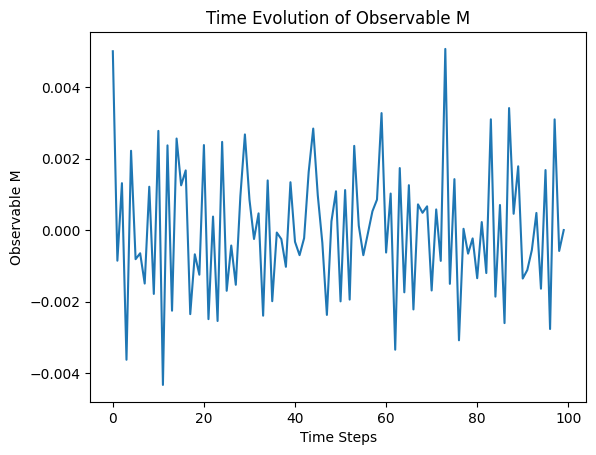

In [2]:
lent = 8
bases = basis_cr2(lent)
mu_omega = 1.68
time_steps = 100
start_state = 3
ma = []

mat_t = h(bases, mu_omega)

for n in range(time_steps):
    tlt = -1j * mat_t * n
    ut = expm(tlt)
    rho0 = identity(len(bases))
    rhot = ut @ rho0
    
    M = 0
    for i in range(len(bases)):
        state = bases[i]
        prob = rhot[i, start_state].real
        if prob != 0:
            nj = sum(((-1)**j * state[j] + ((1 - (-1)**j) / 2)) for j in range(len(state)))
            M += prob * nj
    
    ma.append(M / (lent * time_steps))

plt.plot(ma)
plt.xlabel('Time Steps')
plt.ylabel('Observable M')
plt.title('Time Evolution of Observable M')
plt.show()
